<a href="https://colab.research.google.com/github/ValenTesting20/qeqeq/blob/main/Balmer_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a computer program code, used for Physics Balmer Series experiment to analyse and visualise the collected data
# Valen Lebepe
# 28 August 2025

In [5]:
# Importing relevant python libraries
import pandas as pd    # importing pandas
import numpy as np     # importing numpy
import matplotlib.pyplot as plt    # importing matplotlib.pyplot for non-interactve plots
from scipy.optimize import curve_fit  # importing the curve fitting module for SciPy
import plotly.express as px     # Importing Plotly for interactive Plots


**SciPy** library **scipy.optimize.curve_fit** allows you to fit any mode you can imagine to your data.

It works works by finding **optimal parameters**, these are are parameters that describes the observed data more closely - these are values for the input of your model function that causes the function's curve to come as close as possible to you data points.

In [25]:
# Importing in the data/ reading the DataFrame
df = pd.read_csv("laser.csv", sep="," ,skiprows= 14, names =["wavelength", "counts"])



,wavelength,counts
0,6303.0,129
1,6303.5,115
2,6304.0,133
3,6304.5,113
4,6305.0,113
...,...,...
130,6368.0,128
131,6368.5,140
132,6369.0,138
133,6369.5,129


Remember the data structure in Pandas are called **DataFrame**, thus the word **df**
The **skiprows** variables skips the nummber of rows from row zero up to row 13, or more generally up to row **x**, such that skiprows = x. So every row up to and including row x are skipped.

In [26]:
# Cleaning and filtering the data

# Converting the columns to number
df["wavelength"]= pd.to_numeric(df["wavelength"], errors="coerce")
df["counts"]= pd.to_numeric(df["counts"], errors="coerce")

# Drop any rows that have missing or invalid values
df = df.dropna()


135


The **df.dropna()** is a crucial tool, for data cleaning, it removes and **rows** from you data that contains missing values.

* `cleaned_df =df.dropna()` This removes rows with **any** missing values
* `cleaned_df =df.dropna(how='all')` This removes rows where **all** values are missing.
* `cleaned_df =df.dropna(subset=['wavelength'])` This removes row missing values only in a specific column(column "wavelength" in this case)



In [52]:
# Visualizing the raw data data

# Using Plotly
fig1 =px.scatter(df, x="wavelength", y = "counts", title="The Spectrum of a HeNe Laser",labels = {"wavelength":"λ[Å]", "counts":"counts"})
fig1.show()



In [30]:
# Filtering out the data and picking up an area of interest
filtered_df = df[(df["wavelength"]>= 6340) & (df["wavelength"]<=6360)]



In [31]:
# Visualiising the filtered data
fig2 = px.scatter(filtered_df, x="wavelength", y="counts", title="The Spectrum of a HeNe Laser", labels = {"wavelength":"λ[Å]", "counts":"counts"})
fig2.show()
#

## Using SciPy.Optimize.curve_fit
After importing curve_fit from scipy (`from scipy.optimize import curve_fit`), the next step is to **define your model funtion** `(def function:)`. This invloves writing up a mathematical funtion that you want to fit to you data set. The model you define needs to have a set of parameter variables, and the code works by funding the parameters that fit you data best. The first entry to your function should **always** be the independent variable **x** and the fiting parameters follow. i.e `def gaussian (x, mu, sigma)`. This is because curve_fit expect your first entry to be x.

After defining you model, you need to give you model initial Guess parameters (`p0 = [mu, sigma]`). This is the starting point values that you need to give your model, if your guess is bad the model may fail. So you have to give a good guess, and you can do this y carefully looking at your plot. Your initial guesses must be given in the same order as in your defined model funtion.

After you're done defining these two you now need to feed them to the algorithm (SciPy) and let it do the fitting [`popt,pcov = curve_fit(gaussian), df['x'], df['y'], p0`]. It will return the:
* **optimal parameters** [`popt`]found by the search.
* And the **covariance matrix** [`pcov`] found by the searh. This is tell you the **unertainty** of the parameters determined by the search. The diagonal values of the covariance matric are the variance of each of the parameters (in order) then the **square root of these diagonal values of the covariance matrix** gives you the standard deviation which is the **uncertaity (perr)** (`perr =np.sqrt(np.diag(pcov))`) of each of the parameter determined. (corresponding to the order of how the parameters where defined)

The Centroid is:6350.285 +/- 0.016 Å


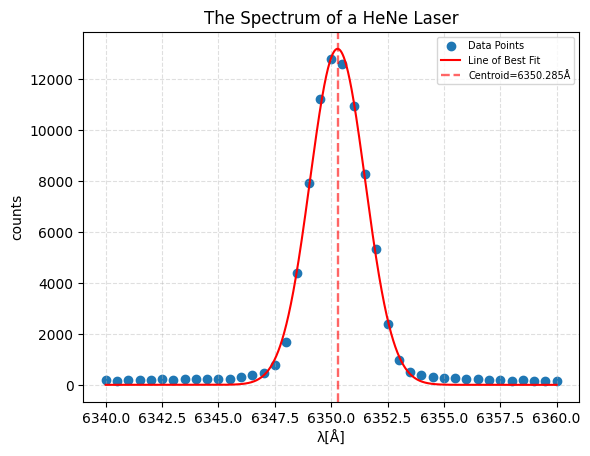

In [128]:
##### Fittng in the Model of best Fit to the data #####

# Defining the model function
def gaussian (x,mu, sigma, a): # the data can be best modeled by a gaussian
  return  a*(np.exp(-1*(x-mu)**2/(2*sigma**2)))

#(  return  (1/(sigma*(np.sqrt(2*np.pi))))*(np.exp(-1*(x-mu)**2/(2*sigma**2))))
# mu is the mean (centroid) and the centre of the distribution. It is the **x value** where the function is at its maximum
# sigma is the parameter that determines how spread out or concentrated the curve is. It is the standard deviation.

# Making initial guesses
p0 = [6350, 10, 12000]

# Executing the fit
popt, pcov =curve_fit(gaussian, filtered_df["wavelength"], filtered_df["counts"], p0)

# Printing out the Relevent Optimal parameter (centroid)
perr = np.sqrt(np.diag(pcov))
print(f"The Centroid is:{popt[0]:.3f} +/- {perr[0]:.3f} Å")

# Visualising the model
x_fit = np.linspace(min(filtered_df["wavelength"]), max(filtered_df["wavelength"]), 10000)
y_fit = np.array(gaussian(x_fit,popt[0], popt [1], popt [2]))

# Ploting the data and the model
plt.scatter(filtered_df["wavelength"], filtered_df["counts"], label ="Data Points")
plt.plot(x_fit,y_fit, "r", label = "Line of Best Fit")
plt.axvline(x= popt[0],color ="red",label =f'Centroid={popt[0]:.3f}Å',  linestyle ="--", alpha =0.6, linewidth =1.7)
plt.grid(True, linestyle ="--" ,alpha=0.4)

plt.title("The Spectrum of a HeNe Laser")
plt.xlabel("λ[Å]")
plt.ylabel("counts")
plt.legend(fontsize= 7)

plt.show()
#plt.savefig("laser.png")

In [ ]:
# Creating the plot of the results (An interactive plot with Plotly)

# Creating the scatter plot
fig = px.scatter(filtered_df, x="LogP", y="I", title="I-band Period-Luminosity Relation for LMC Cepheids", labels={"LogP": "log(Period[days])", "I":"I-band Magnitude"}, hover_data= ["LogP", "I"] ) #Show this data while hovering

# Creating the line of best fit
x_line = np.linspace(filtered_df["LogP"].min(),filtered_df["LogP"].max(),1000)   # Data
y_line = results.slope*x_line + results.intercept
# storing the x and y of the line of best fit in a data frame
line_df=pd.DataFrame({"logP": x_line, "I-mag-predicted": y_line})
#line_df.head(2) # returns the first 2 rows
#line_df.tail(2) # returns the last 2 rows

# Plotting the line of best fit
fig.add_trace(px.line(line_df,x="logP",y="I-mag-predicted", color_discrete_sequence=['red']).data[0])
fig.data[1].name =f'Best Fit (R squared = {results.rvalue**2:.3f})'

# Showing the plot
fig.show()
#fig.write_html("LMC_Cepheids.html")   # Saves the image as an Interactive HTML file

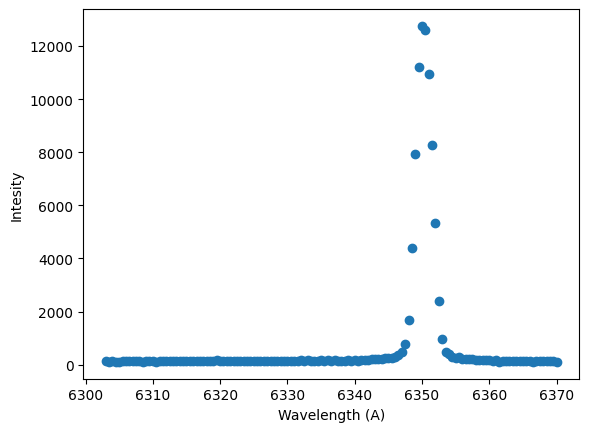

In [ ]:
import os
import matplotlib.pyplot as plt

filename = 'laser.csv'
# Put your file's name here. Remember that you need to be in the same
# folder as your data, and don't forget the .csv!

file = open(filename, 'rt')

for i in range(14):
    file.readline()

wave, ints = [], []

for line in file:
    split = line.split(',')
    newlinesplit = split[1].split('\\n')[0]
    wave.append(float(split[0]))
    ints.append(int(newlinesplit))


plt.scatter(wave, ints)

plt.xlabel('Wavelength (A)')
plt.ylabel('Intesity')
plt.show()


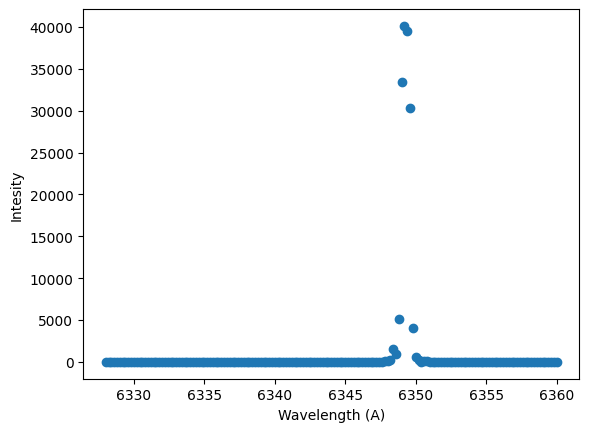

In [ ]:
import os
import matplotlib.pyplot as plt

filename = 'LaserF.csv'
# Put your file's name here. Remember that you need to be in the same
# folder as your data, and don't forget the .csv!

file = open(filename, 'rt')

for i in range(14):
    file.readline()

wave, ints = [], []

for line in file:
    split = line.split(',')
    newlinesplit = split[1].split('\\n')[0]
    wave.append(float(split[0]))
    ints.append(int(newlinesplit))


plt.scatter(wave, ints)

plt.xlabel('Wavelength (A)')
plt.ylabel('Intesity')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')